<a href="https://colab.research.google.com/github/NeSma237/restaurant-recommender/blob/main/restaurant_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install kagglehub[pandas-datasets]


In [54]:
!pip install kagglehub[pandas-datasets]

import kagglehub
from kagglehub import KaggleDatasetAdapter


file_path = "zomato.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "shrutimehta/zomato-restaurants-data",
    file_path,
    pandas_kwargs={"encoding": "latin-1"}
)


df.head()


<ipython-input-54-95f8bf2281f6>:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [55]:
# أولًا نشوف أسماء الأعمدة
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [56]:
import pandas as pd
# حذف الأعمدة الغير مفيدة
columns_to_drop = [
    'Restaurant ID', 'Country Code', 'Address', 'Locality Verbose',
    'Longitude', 'Latitude', 'Has Table booking', 'Has Online delivery',
    'Is delivering now', 'Switch to order menu', 'Price range',
    'Rating color', 'Rating text'
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# إعادة تسمية الأعمدة المهمة لسهولة المعالجة
df.rename(columns={
    'Restaurant Name': 'name',
    'City': 'city',
    'Locality': 'locality',
    'Cuisines': 'cuisines',
    'Average Cost for two': 'cost',
    'Aggregate rating': 'rating',
    'Votes': 'votes'
}, inplace=True)

# عرض البيانات بعد التنظيف المبدئي
df.head()


,name,city,locality,cuisines,cost,Currency,rating,votes
0,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),4.8,314
1,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),4.5,591
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),4.4,270
3,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),4.9,365
4,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),4.8,229


In [57]:
df.drop_duplicates(inplace=True)

# توحيد الصيغة إلى lowercase + إزالة المسافات الزائدة
df['cuisines'] = df['cuisines'].str.lower().str.strip()


In [58]:
# تحويل التقييم إلى أرقام (في بعض الأحيان تكون "NEW" أو "Not rated")
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# إزالة الفواصل من "cost" وتحويلها لأرقام
df['cost'] = df['cost'].astype(str).str.replace(',', '', regex=True)
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

# تحويل عدد الأصوات لأرقام
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')



In [59]:
# استخراج أول نوع مطبخ في حالة وجود أكثر من نوع
df['primary_cuisine'] = df['cuisines'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else x)


In [60]:
# دالة لتصنيف الكلفة إلى low, medium, high
def cost_bucket(cost):
    if pd.isnull(cost):
        return None
    elif cost < 300:
        return 'low'
    elif 300 <= cost <= 700:
        return 'medium'
    else:
        return 'high'

df['cost_category'] = df['cost'].apply(cost_bucket)


In [61]:
# حذف الصفوف التي لا تحتوي على معلومات أساسية
df.dropna(subset=['city', 'cuisines', 'cost', 'rating', 'votes'], inplace=True)
df.reset_index(drop=True, inplace=True)


In [62]:
df.head()

,name,city,locality,cuisines,cost,Currency,rating,votes,primary_cuisine,cost_category
0,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City","french, japanese, desserts",1100,Botswana Pula(P),4.8,314,french,high
1,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",japanese,1200,Botswana Pula(P),4.5,591,japanese,high
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","seafood, asian, filipino, indian",4000,Botswana Pula(P),4.4,270,seafood,high
3,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","japanese, sushi",1500,Botswana Pula(P),4.9,365,japanese,high
4,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","japanese, korean",1500,Botswana Pula(P),4.8,229,japanese,high


In [63]:
df.tail()

,name,city,locality,cuisines,cost,Currency,rating,votes,primary_cuisine,cost_category
9533,NamlÛ± Gurme,ÛÁstanbul,Karakí_y,turkish,80,Turkish Lira(TL),4.1,788,turkish,low
9534,Ceviz AÛôacÛ±,ÛÁstanbul,Koôuyolu,"world cuisine, patisserie, cafe",105,Turkish Lira(TL),4.2,1034,world cuisine,low
9535,Huqqa,ÛÁstanbul,Kuruí_eôme,"italian, world cuisine",170,Turkish Lira(TL),3.7,661,italian,low
9536,Aôôk Kahve,ÛÁstanbul,Kuruí_eôme,restaurant cafe,120,Turkish Lira(TL),4.0,901,restaurant cafe,low
9537,Walter's Coffee Roastery,ÛÁstanbul,Moda,cafe,55,Turkish Lira(TL),4.0,591,cafe,low


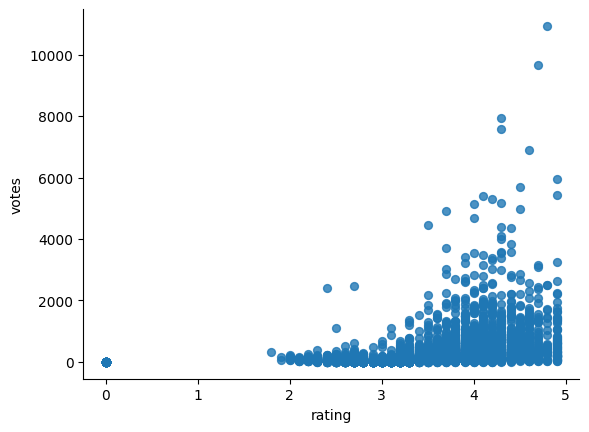

In [64]:
# @title rating vs votes

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='rating', y='votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [65]:
# حفظ الداتا النظيفة في ملف CSV
df.to_csv('cleaned_zomato_data.csv', index=False)

print("تم حفظ البيانات النظيفة في ملف cleaned_zomato_data.csv")

تم حفظ البيانات النظيفة في ملف cleaned_zomato_data.csv


In [66]:
def filter_and_rank(df, cuisine=None, budget=None, city=None, top_n=10):
    # نسخة من البيانات الأصلية علشان ما نعدلش فيها
    filtered = df.copy()

    # فلترة حسب المدينة
    if city:
        filtered = filtered[filtered['city'].str.lower() == city.lower()]

    # فلترة حسب نوع المطبخ
    if cuisine:
        filtered = filtered[filtered['primary_cuisine'].str.lower() == cuisine.lower()]

    # فلترة حسب الميزانية
    if budget:
        filtered = filtered[filtered['cost_category'].str.lower() == budget.lower()]

    # إزالة أي missing بعد الفلترة
    filtered = filtered.dropna(subset=['rating', 'votes'])

    # حساب Score: نجمع بين التقييم وعدد الأصوات
    # ممكن نستخدم weighted score بسيط مثلاً:
    filtered['score'] = filtered['rating'] * (filtered['votes'] / (filtered['votes'].max() + 1))

    # ترتيب حسب score
    filtered = filtered.sort_values(by='score', ascending=False)

    # نرجّع أعلى N نتائج
    return filtered[['name', 'city', 'primary_cuisine', 'cost', 'rating', 'votes']].head(top_n)


In [67]:
filter_and_rank(df, cuisine='french', budget='high', city='Makati City', top_n=5)


,name,city,primary_cuisine,cost,rating,votes
0,Le Petit Souffle,Makati City,french,1100,4.8,314


In [68]:
def explain_row(row):
    return f"Matched on {row['primary_cuisine'].title()} cuisine and ₹{int(row['cost'])} budget with {row['rating']}★ rating"

# مثال عرض مع شرح
results = filter_and_rank(df, cuisine='indian', budget='medium', city='new delhi', top_n=5)
for i, row in results.iterrows():
    print(f"🍽️ {row['name']} — {explain_row(row)}")


In [69]:
!pip install streamlit
import streamlit as st
# Streamlit UI
st.title("🍽️ Knowledge-Based Restaurant Recommender")

# Sidebar for user inputs
st.sidebar.header("Your Preferences")

city_input = st.sidebar.text_input("Enter city (e.g. New Delhi, Makati City):")

cuisine_options = df['primary_cuisine'].dropna().unique().tolist()
cuisine_input = st.sidebar.multiselect("Select cuisine(s):", options=cuisine_options)

budget_input = st.sidebar.selectbox("Select budget:", options=['', 'low', 'medium', 'high'], index=0)

top_n = st.sidebar.slider("Number of recommendations:", 1, 20, 10)

# Button to trigger recommendations
if st.sidebar.button("Show Recommendations"):
    results = filter_and_rank(df, cuisines=cuisine_input, budget=budget_input, city=city_input, top_n=top_n)

    if results.empty:
        st.warning("No restaurants found matching your criteria.")
    else:
        for idx, row in results.iterrows():
            st.markdown(f"### {row['name']}")
            st.write(f"- Cuisine: **{row['primary_cuisine'].title()}**")
            st.write(f"- Cost Category: **{row['cost_category'].title()}** (Approx ₹{int(row['cost'])} for two)")
            st.write(f"- Rating: **{row['rating']}★** based on **{int(row['votes'])} votes**")
            st.write(explain_row(row))

            # Map display if latitude and longitude exist
            if pd.notnull(row.get('latitude')) and pd.notnull(row.get('longitude')):
                st.map(pd.DataFrame({'lat': [row['latitude']], 'lon': [row['longitude']]}))

            st.markdown("---")

2025-05-19 03:55:49.992 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 03:55:49.993 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 03:55:49.996 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 03:55:50.000 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 03:55:50.001 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 03:55:50.005 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 03:55:50.006 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 03:55:50.007 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [70]:
with open("app.py", "w") as f:
    f.write("""<انسخ الكود اللي فوق هنا>""")


In [71]:
with open("requirements.txt", "w") as f:
    f.write("streamlit\nscikit-learn\npandas\nnltk\njoblib")


In [73]:
from google.colab import files
files.download("app.py")
files.download("requirements.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>